In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)

In [3]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./Data_No_Identificada_Tratada.csv')
data.head()

Cargamos los datos


,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,...,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency,second_sp,second_dp,third_sp,third_dp
0,5,ICMP,NaN,NaN,0.0,0.000,0.000,0.000,0.000,0.0,...,1.0,40.00,286.0,286.0,mine,Unclassified,5353,1281,45560,5353
1,16,UDP,ICMP6,NaN,0.0,3.002,9.474,300.933,116.215,0.0,...,4.0,41.75,563.5,688.0,mine,Unclassified,0,5353,34879,34560
2,20,ICMP6,NaN,NaN,0.0,0.000,0.000,0.000,0.000,0.0,...,1.0,32.00,32.0,32.0,mine,Unclassified,5353,34304,45560,5353
3,315,TCP,UDP,NaN,0.0,0.001,45.779,9668.430,149.574,0.0,...,6.0,32.00,96.0,248.0,not_mine,Does_not_have,80,80,53890,53890
4,17,ICMP6,NaN,NaN,0.0,0.000,0.000,0.000,0.000,0.0,...,1.0,32.00,32.0,32.0,mine,Unclassified,5353,34304,45560,5353


In [4]:
data_discreta = (data.dtypes == 'int64')
data_categorica = (data.dtypes == 'object')
data_continua = (data.dtypes == 'float64')
data_discreta = [c for c in data_discreta.index if data_discreta[c]]
data_categorica = [c for c in data_categorica.index if data_categorica[c]]
data_continua = [c for c in data_continua.index if data_continua[c]]


In [5]:
data_n = pd.concat([data[data_continua], data[data_discreta], data['Type']], axis = 1)
data_n.columns

Index(['p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'p1_ip', 'p2_ip',
       'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib', 'Netflows', '#packets', 'Avg_bps',
       'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'first_dp',
       'second_sp', 'second_dp', 'third_sp', 'third_dp', 'Type'],
      dtype='object')

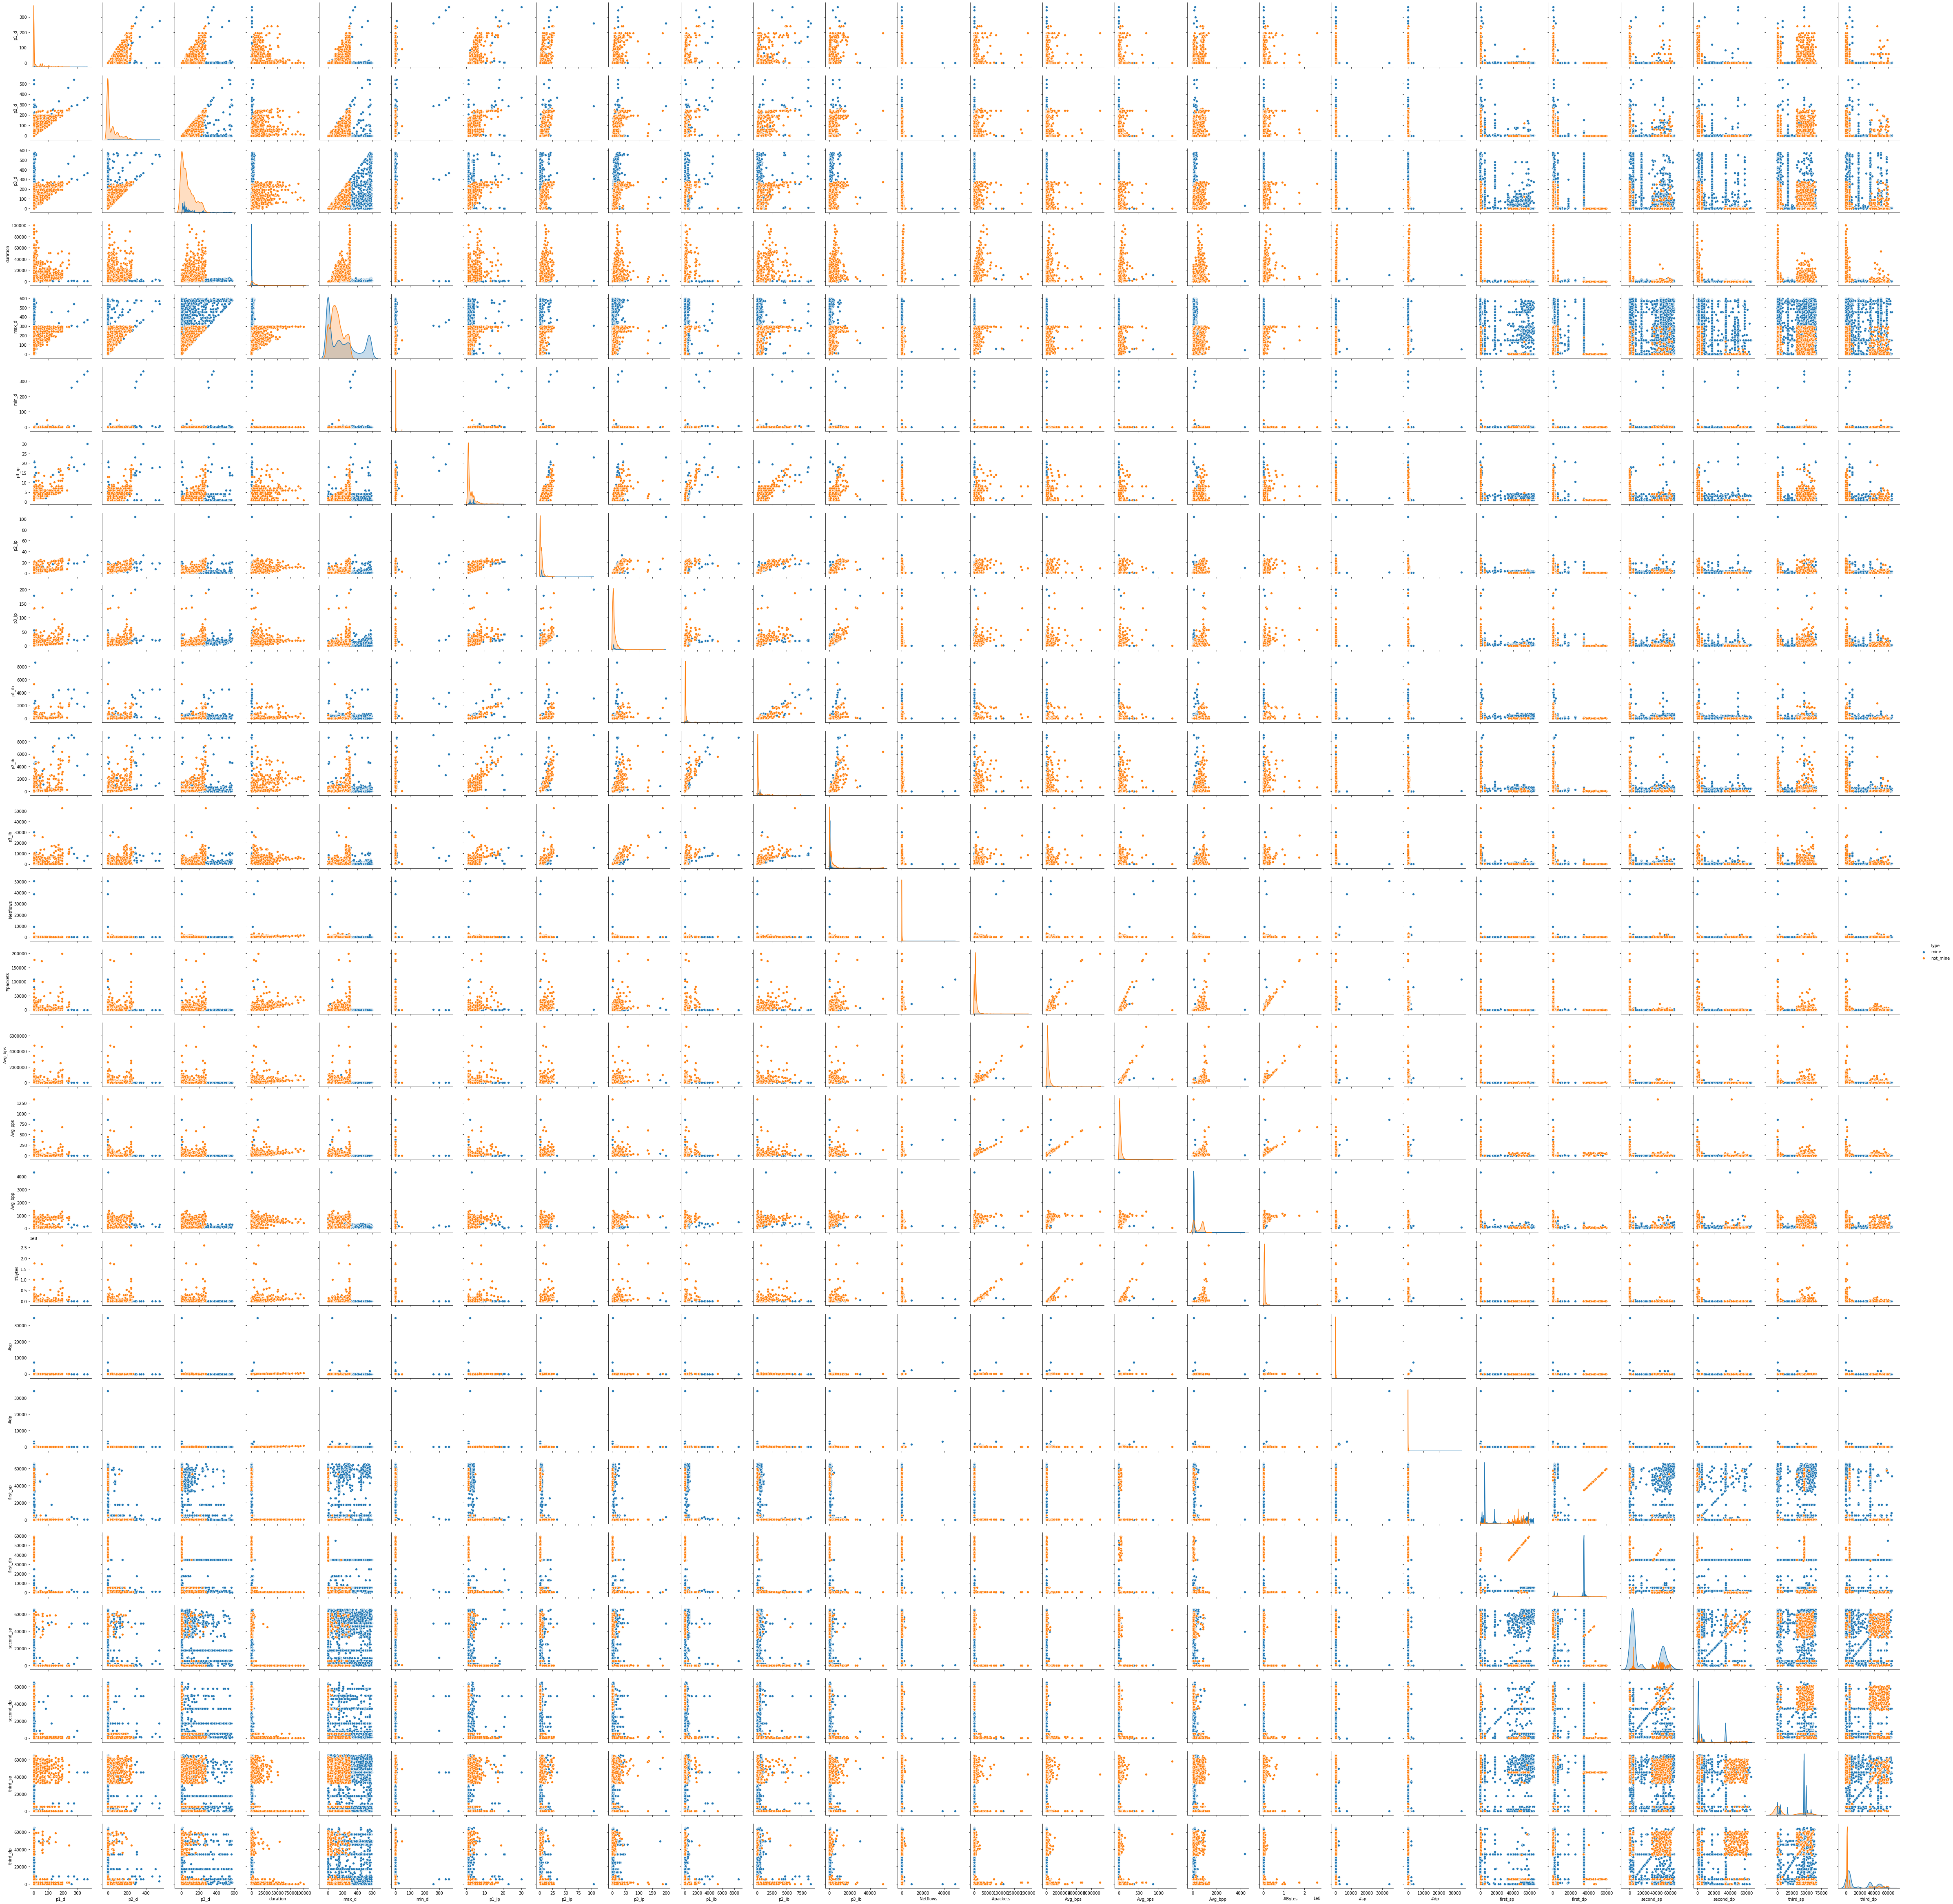

In [6]:
sns.pairplot(data_n, hue='Type')